Question 3: Decision Trees with Cross-Validation<br>
Task: Implement cross-validation for decision trees to find the best performing model on a
classification problem.

Best max_depth from cross-validation: 3
Test Accuracy of best model: 1.00


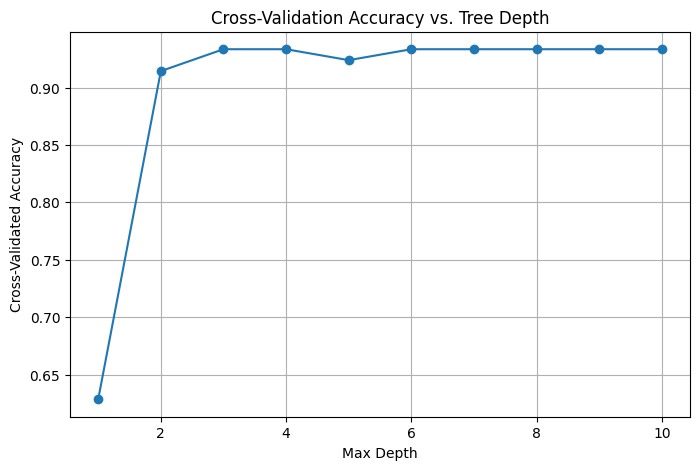

In [1]:
# Write your code here
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pyplot as plt

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

depths = range(1, 11)
cv_scores = []

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

best_depth = depths[np.argmax(cv_scores)]
print(f"Best max_depth from cross-validation: {best_depth}")

best_model = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
best_model.fit(X_train, y_train)
test_accuracy = best_model.score(X_test, y_test)
print(f"Test Accuracy of best model: {test_accuracy:.2f}")

plt.figure(figsize=(8, 5))
plt.plot(depths, cv_scores, marker='o')
plt.title("Cross-Validation Accuracy vs. Tree Depth")
plt.xlabel("Max Depth")
plt.ylabel("Cross-Validated Accuracy")
plt.grid(True)
plt.show()
